Un anumit produs se poate afla la vanzare (20%) cu reducere sau cu pret intreg. Cumparatorul poate avea nevoie urgenta (5%) de produsul respectiv sau nu. Cumparatorul ia decizia sa cumpere produsul dupa urmatoarele reguli:
1. produsul este la reducere si are nevoie urgent de el -> cumperi 100%
2. produsul este la reducere dar nu are nevoie urgent de el -> cumperi 50%
3. fara reducere si are nevoie urgent -> cumperi 80% 
4. fara reducere si nu are nevoie urgent -> cumperi 20%

Afisati probabilitatea ca cumparatorul sa fi avut nevoie urgenta de produs daca stim ca acesta a cumparat produsul.

**Raspuns teoretic:**

$$
P(U=1|C=1)=\frac{P(C=1|U=1)P(U=1)}{P(C=1|U=1)P(U=1)+P(C=1|U=0)P(U=0)}.
$$
Avem:
\begin{align*}
P(C=1|U=1)  & =P(C=1|U=1,R=1)P(R=1)+P(C=1|U=1,R=0)P(R=0)\\
& =1\cdot0.2+0.8\cdot0.8=0.84;\\
P(C=1|U=0)  & =P(C=1|U=0,R=1)P(R=1)+P(C=1|U=0,R=0)P(R=0)\\
& =0.5\cdot0.2+0.2\cdot0.8=0.26.
\end{align*}
Deci
$$
P(U=1|C=1)=\frac{0.84\cdot0.05}{0.84\cdot0.05+0.26\cdot0.95}=0.14533.
$$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import arviz as az

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
model = pm.Model()

with model:
    urgent = pm.Bernoulli('U', 0.05)
    reducere = pm.Bernoulli('R', 0.2)
    cumpara_p = pm.Deterministic('C_p', pm.math.switch(reducere, pm.math.switch(urgent, 1, 0.5), pm.math.switch(urgent, 0.8, 0.2)))
    cumpara = pm.Bernoulli('C', p=cumpara_p, observed=1)

with model:
    trace = pm.sample(20000)

Multiprocess sampling (4 chains in 4 jobs)
BinaryGibbsMetropolis: [U, R]


Sampling 4 chains for 1_000 tune and 20_000 draw iterations (4_000 + 80_000 draws total) took 49 seconds.


In [4]:
df = trace.to_dataframe(trace)

In [5]:
p_urgent = df[(df['U'] == 1)].shape[0] / df.shape[0]
print(p_urgent)

0.146675


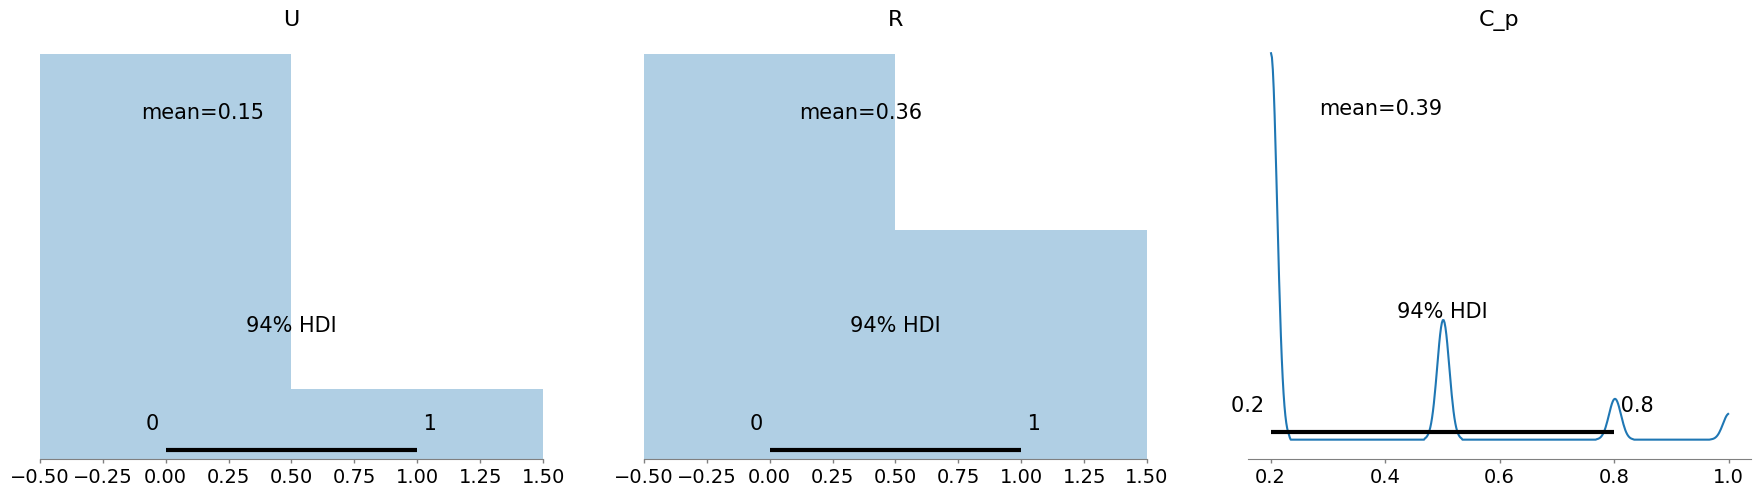

In [6]:
az.plot_posterior(trace)
plt.show()